## Import libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
import pprint
%matplotlib inline

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Attributes

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Clean the dataset
### Check for null and duplicate values

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.duplicated().any()

False

In [7]:
df["Cholesterol"].replace(0,np.nan,inplace=True)
df.dropna(inplace=True)

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1


### Get dataframe information and shape

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    object 
 2   ChestPainType   746 non-null    object 
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    float64
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    object 
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    object 
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    object 
 11  HeartDisease    746 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 75.8+ KB


In [10]:
df.shape

(746, 12)

### Statistics

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
HeartDisease,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### Correlation Matrix

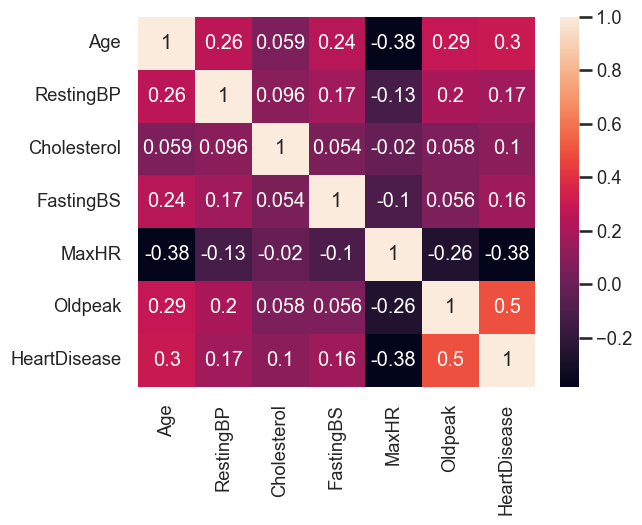

In [14]:
sns.set_theme(context="talk",font_scale=0.8)
sns.heatmap(df.corr(),annot=True)
plt.show()

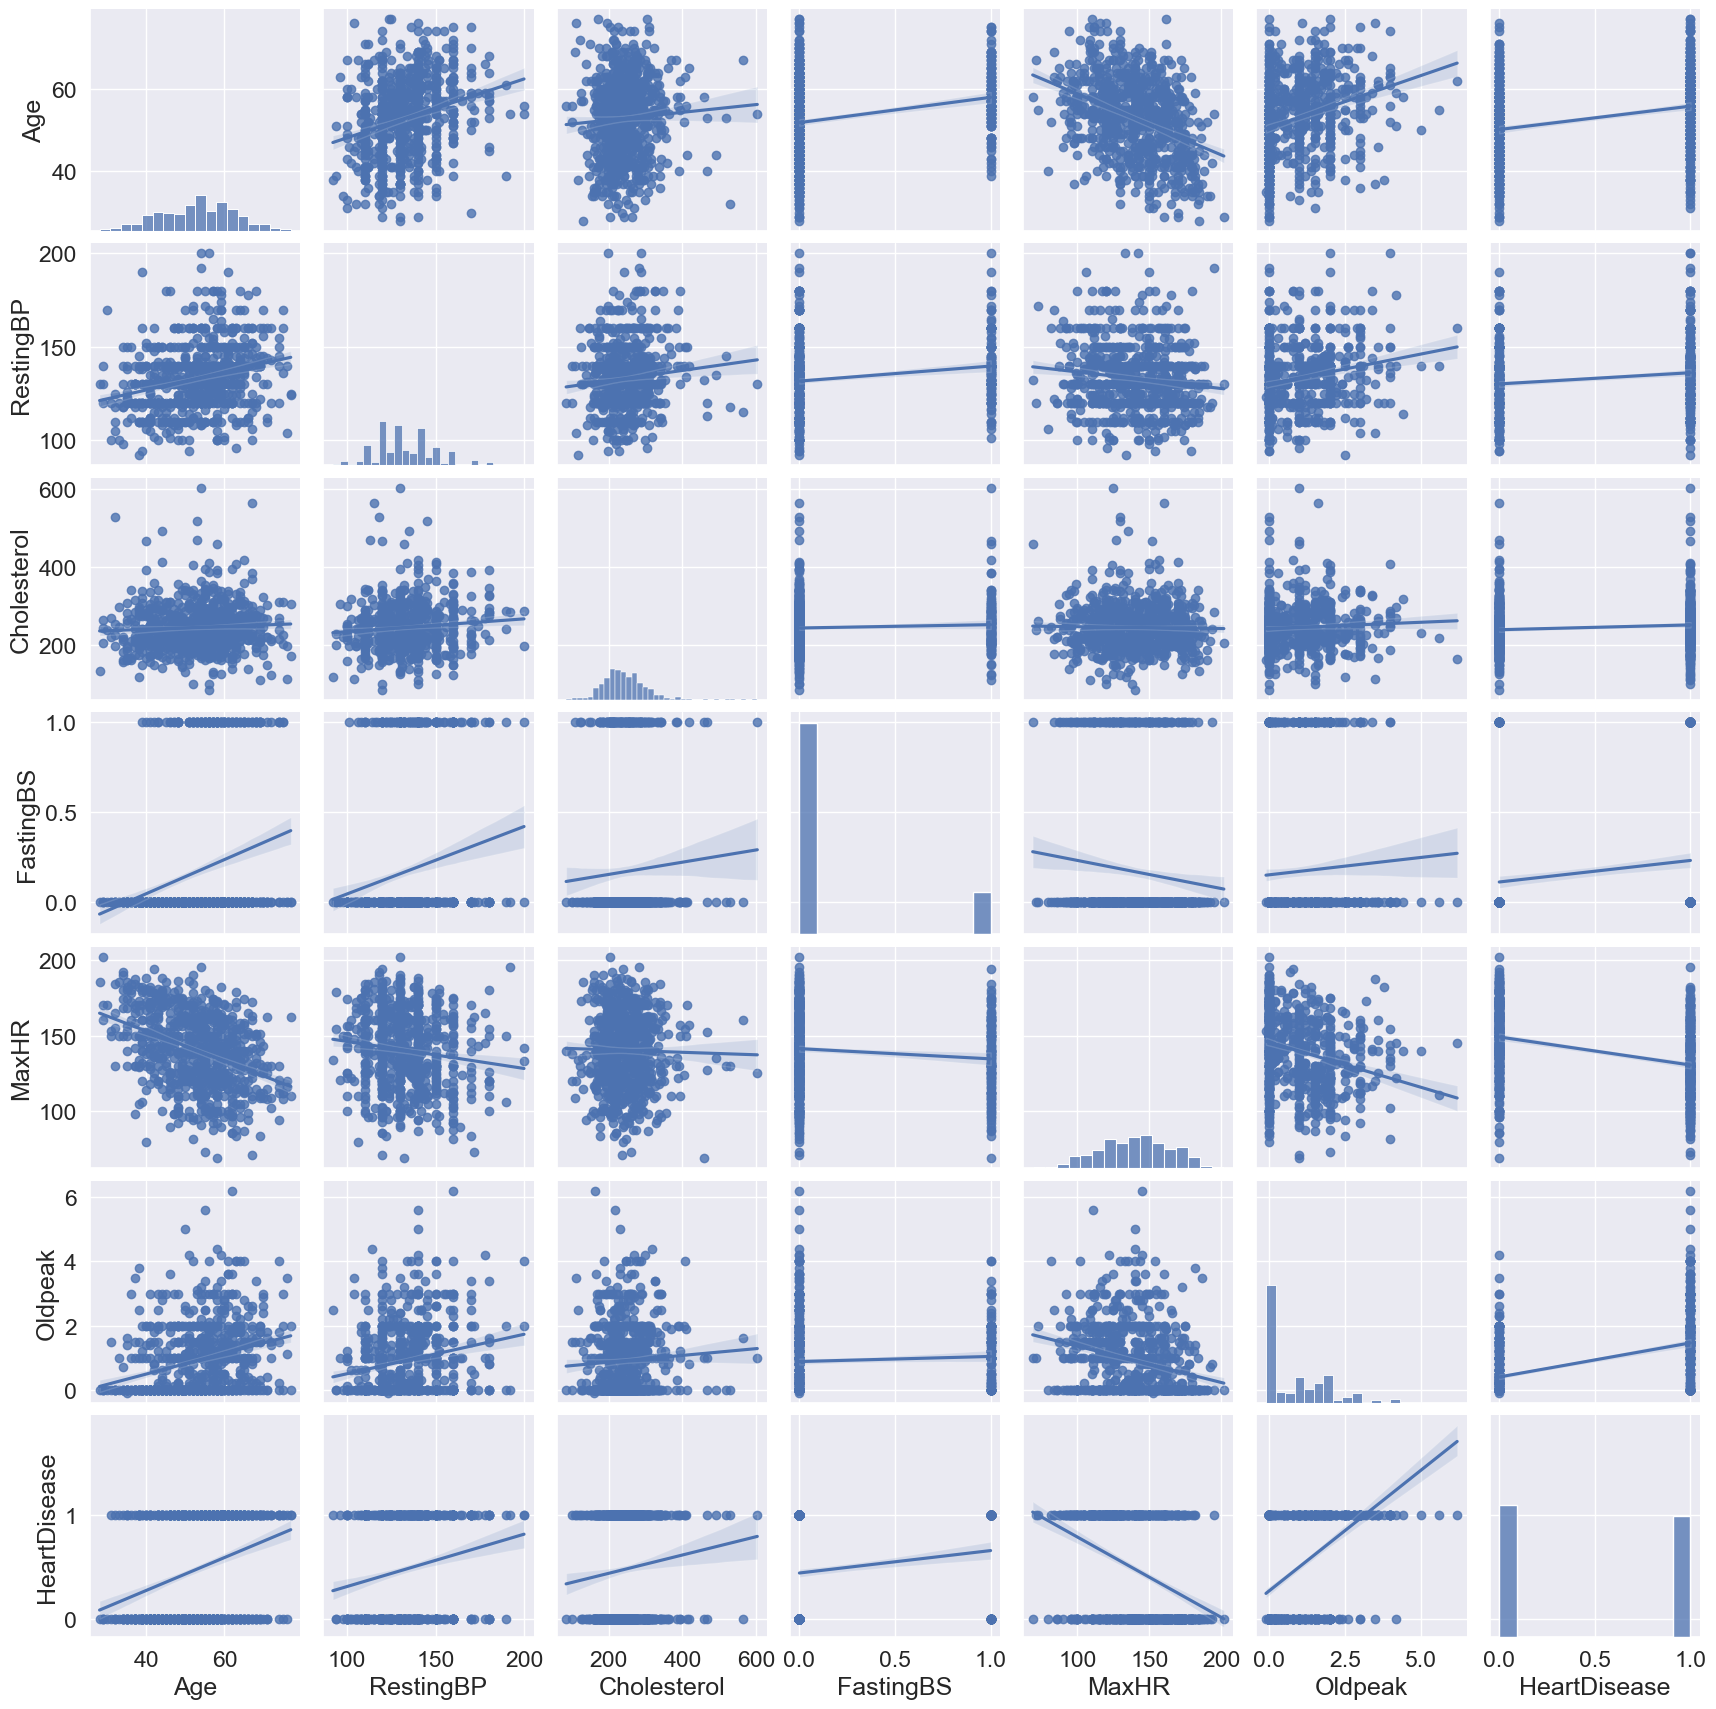

In [63]:
sns.set_theme(context="notebook",font_scale=1.5)
sns.pairplot(df, kind="reg")
plt.show()

#### Sorting data into continuous and categorical

In [17]:
cat_value = []
cont_value = []

for column in df.columns:
    if len(df[column].unique())<=5:
        cat_value.append(column)
    else:
        cont_value.append(column)

## Plotting Continous Data

In [18]:
cont_value

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [19]:
def dist_plot(data,title):
    sns.set_theme(context="notebook",palette="Blues_r",style="darkgrid")
    sns.histplot(data,kde=True,stat="count")
    plt.title(title)
    plt.show()

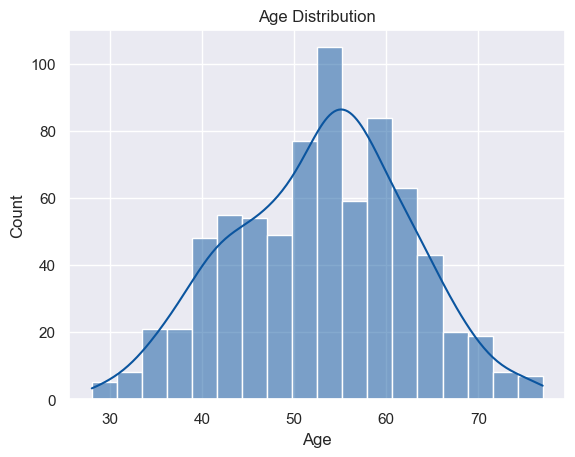

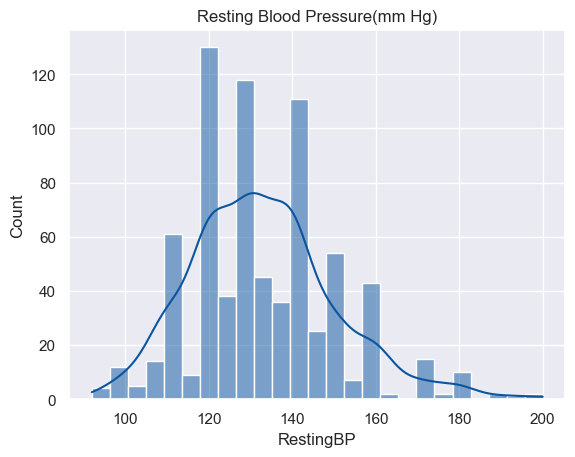

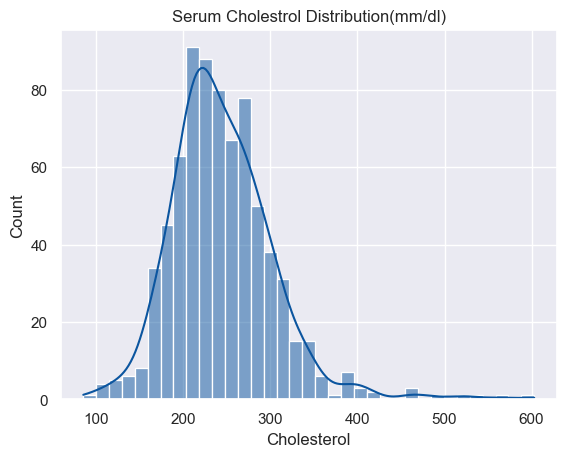

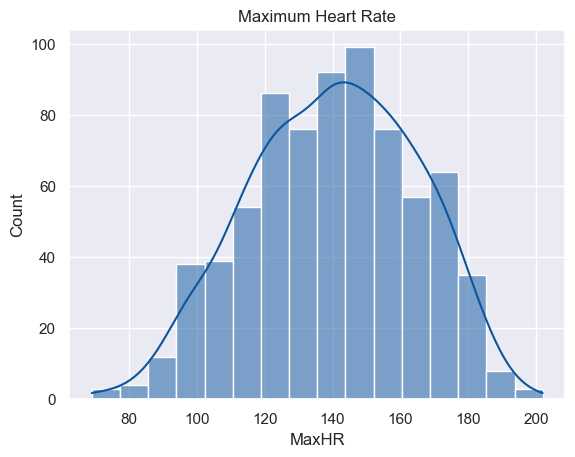

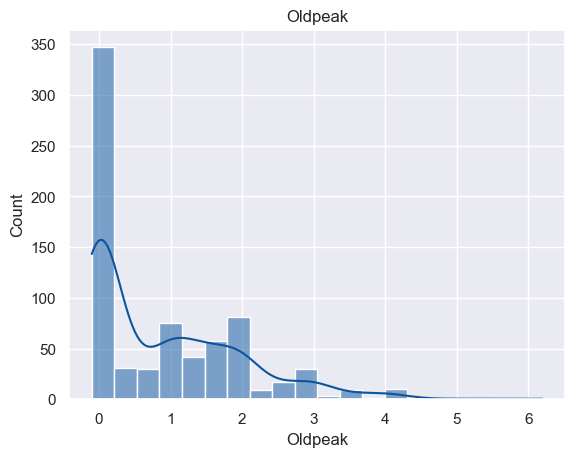

In [20]:
dist_plot(df["Age"],"Age Distribution")
dist_plot(df["RestingBP"], "Resting Blood Pressure(mm Hg)")
dist_plot(df["Cholesterol"], "Serum Cholestrol Distribution(mm/dl)")
dist_plot(df["MaxHR"],"Maximum Heart Rate")
dist_plot(df["Oldpeak"],"Oldpeak")

In [21]:
# sns.distplot(cont_value)

# df.hist(cont_value,figsize=(15,15))
# plt.tight_layout()
# plt.show()

In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

### How many people have heart disease and how many don't?

In [23]:
df["HeartDisease"].value_counts()

0    390
1    356
Name: HeartDisease, dtype: int64

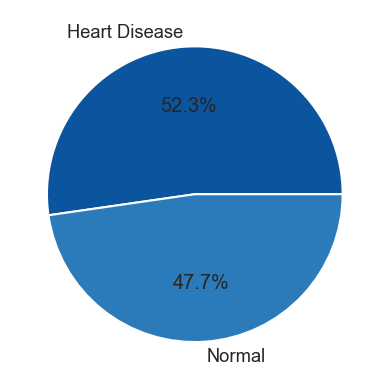

In [24]:
sns.set_theme(context="talk",font_scale=0.8,palette="Blues_r")
plt.pie(df["HeartDisease"].value_counts(),autopct="%1.1f%%",labels=["Heart Disease","Normal"])

plt.show()

## Plotting Catergorical Data

### Gender Dsitribution according to Heart Disease

In [26]:
def count_plot(xvalue,title):
    sns.set_theme(context="talk",font_scale=0.8)
    sns.countplot(data=df,x=xvalue,hue="HeartDisease")
    plt.legend(labels=["Normal","Heart Disease"])
    plt.title(f"{title} Distribution According to Heart Disease")
    plt.show()

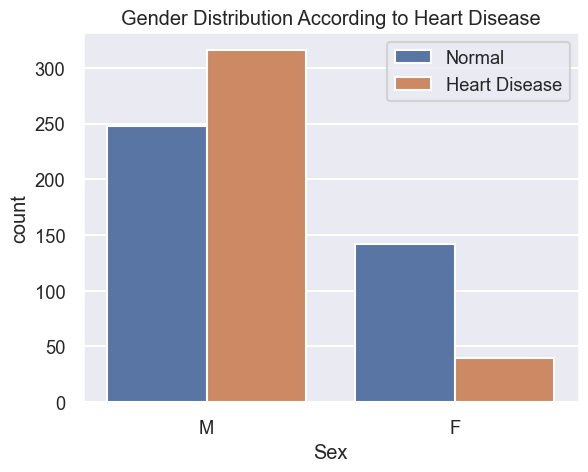

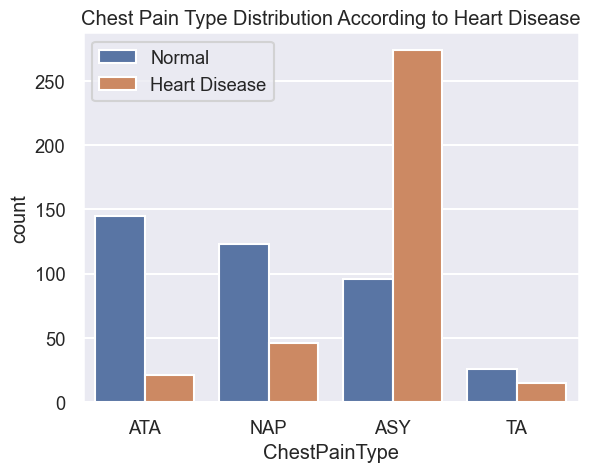

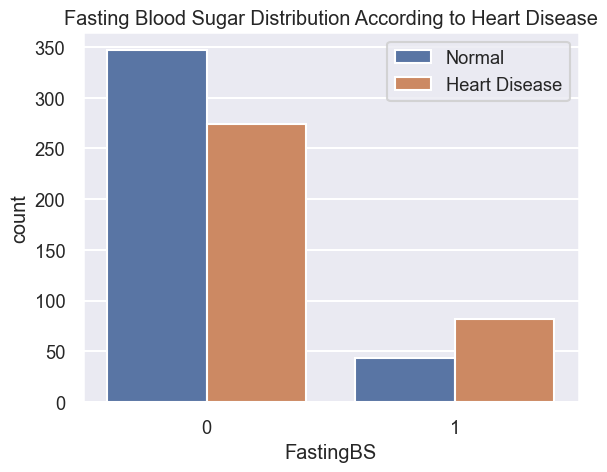

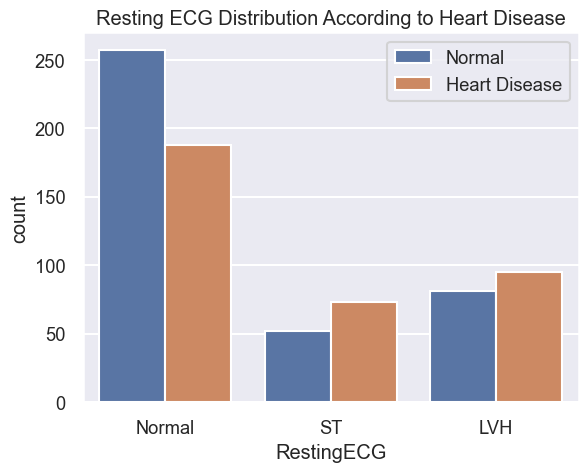

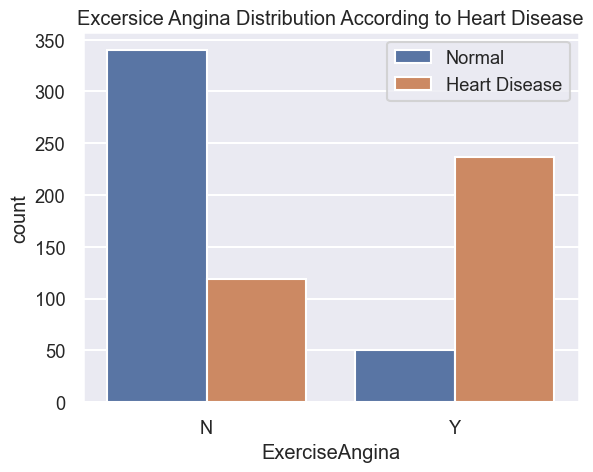

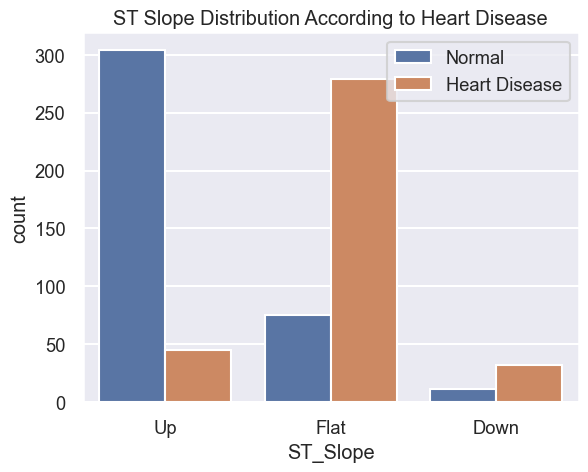

In [27]:
count_plot(df["Sex"],"Gender")
count_plot(df["ChestPainType"],"Chest Pain Type")
count_plot(df["FastingBS"],"Fasting Blood Sugar")
count_plot(df["RestingECG"],"Resting ECG")
count_plot(df['ExerciseAngina'],"Excersice Angina")
count_plot(df['ST_Slope'],"ST Slope")


## Statistical Analysis

### OLS Regression

In [77]:
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [66]:
cont_value

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [87]:
# slicing data for only numeric values and target variable

stats_df=df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"]]

In [88]:
X = stats_df.drop("HeartDisease", axis=1)
X = sm.add_constant(X)
y = stats_df["HeartDisease"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 50)

In [92]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     47.11
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.40e-40
Time:                        13:01:16   Log-Likelihood:                -306.42
No. Observations:                 559   AIC:                             624.8
Df Residuals:                     553   BIC:                             650.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2565      0.224      1.147      0.252      -0.183       0.696
Age             0.0048      0.002      2.270      0.024       0.001       0.009
RestingBP       0.0013      0.001      1.226      0.221      -0.001       0.003
Cholesterol     0.0007      0.000      2.369      0.018       0.000       0.001
MaxHR          -0.0038      0.001     -4.802      0.000      -0.005      -0.002
Oldpeak         0.1837      0.018     10.372      0.000       0.149       0.219
==============================================================================
Omnibus:                       47.595   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.464
Skew:                           0.157   Prob(JB):                     0.000161
Kurtosis:                       2.193   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Logistic Regression

In [190]:
x = df[["Cholesterol"]].values

y = df.HeartDisease

In [191]:
len(x)

746

In [192]:
len(y)

746

In [193]:
y_test=x

In [194]:
logr = linear_model.LogisticRegression()
logr.fit(x,y)

LogisticRegression()

In [200]:
prediction=logr.predict(x)
len(prediction)

746

In [196]:
df[df["Cholesterol"]==300]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
607,53,M,ASY,144,300.0,1,ST,128,Y,1.5,Flat,1
816,58,M,ASY,125,300.0,0,LVH,171,N,0.0,Up,1


In [201]:
acc = accuracy_score(y_test, prediction)
acc

0.0

----
### Using dummification for logistic regression

In [95]:
df2=pd.get_dummies(df)

In [107]:
X = df2.drop("HeartDisease", axis = 1)
y = df2["HeartDisease"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 50)

In [109]:
dum_reg = linear_model.LogisticRegression()
dum_reg.fit(X,y)

LogisticRegression()

In [126]:
y_pred=dum_reg.predict(X_test)

In [202]:
print(dum_reg.intercept_)
print(dum_reg.coef_)

[-0.49148709]
[[ 1.03295500e-02  3.53838836e-03  1.31828601e-03  4.47270623e-01
  -9.21292435e-03  4.59723243e-01 -1.07297877e+00  6.03630645e-01
   1.01247362e+00 -5.90912715e-01 -5.20463363e-01 -3.70445672e-01
   1.06720766e-01 -2.56582703e-01 -3.19486190e-01 -6.65836444e-01
   1.96488317e-01 -8.87217630e-02  9.43701567e-01 -1.32432793e+00]]


In [100]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Logistic testing accuracy is : {accuracy*100:.0f}%")

Logistic testing accuracy is : 88%
